**FOCUS ON LEARNING, NOT FINISHING THE TASK QUICKLY**

In this activity you will be experimenting with regularization. Below, a binary classification task is implemented: the dataset and a complex MLP model is given (when you run the code data will be plotted together with decision boundaries learned by the model).

**TASK 1:**
As you will see in the figure, the decision boundary is too complex, model overfits the data. We would like to get a model with better generalization, simpler decision boundary, via applying regularization. Experiment with different values of regularization and explain your observations.

The test accuracy is printed at the right bottom of the figure. Which models have better performance, one with a complex decision boundary or a simpler decision boundary?

[Original resource](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) written by Issam H. Laradji

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Creating the dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [ ]:
# Regularization parameter set to zero,
# experiment with a list of different values
alphas = [0.75, 0.8, 0.9, 1]

The next cell defines a list of classifiers using the list of alpha values you have picked

In [ ]:
classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            # definition of the classifier
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha, # L2 regularization term
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 20, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

Training models on data, plotting decision boundaries

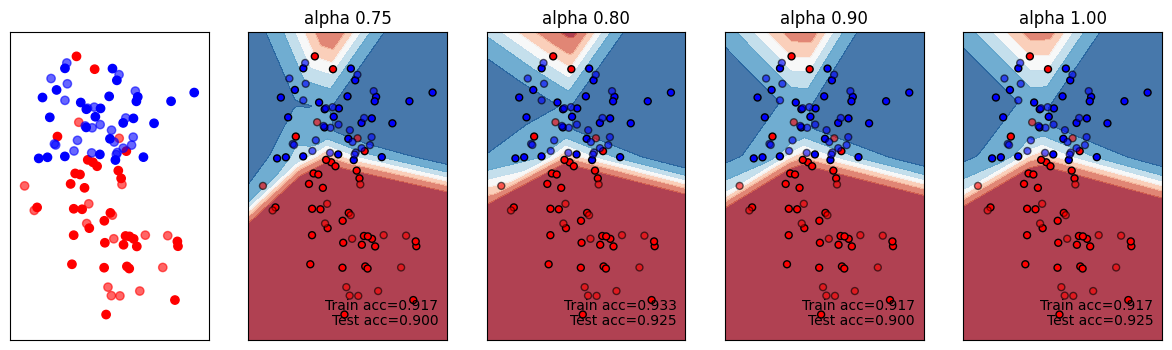

In [ ]:
figure = plt.figure(figsize=(12, 4))
i = 1

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
    else:
        Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=cm_bright,
        edgecolors="black",
        s=25,
    )
    # and testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        alpha=0.6,
        edgecolors="black",
        s=25,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        f"Test acc={test_acc:.3f}".lstrip("0"),
        size=10,
        horizontalalignment="right",
    )
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.6,
        f"Train acc={train_acc:.3f}".lstrip("0"),
        size=10,
        horizontalalignment="right",
    )
    i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

**Task 1 Comments:** Put your comments here.
With regularization turned off (alpha set to zero), looking at the train and test accuracies and the decision boundary, does the model fit well or have under or over fit? How does this change when you apply regularization?

**Task 2:**
Carry all of the task in this interactive page with your friends:
https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises

**It is important for your understanding that you go through it slowly, discuss and question the results obtained. The aim here is not to quickly finish the task but slow down and experiment so that you can really learn.**

Share any interesting observation you make with the instructor.